### <p style='text-align:center;'> Three Ways to Model Iris Data <p/> ###
    
Using the iris data found in seaborn, this notebook illustrates three ways to model the data: 
1. Gaussian Naive Bayes Classification model 
2. Using PCA model of dimensionality reduction, and finally 
3. Clustering the data using Gaussian Mixture model 

In [3]:
import seaborn as sns

In [18]:
iris = sns.load_dataset('iris')

In [19]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [21]:
y_iris=iris['species']
y_iris.shape

(150,)

#### Iris Classification ####

In [22]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

#### Gaussian Naive Bayes #### 

In [23]:
from sklearn.naive_bayes import GaussianNB   # 1. choose model
model = GaussianNB()                         # 2. instantiate model
model.fit(Xtrain, ytrain)                    # 3. fit model to data
y_model = model.predict(Xtest)               # 4. predict on test data

**Evaluate Model** 

In [24]:
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, y_model)

0.9736842105263158

#### Dimesnionality Reduction: Principle Component Analysis" #### 

In [25]:
from sklearn.decomposition import PCA   # 1. model selection 
model=PCA(n_components=2)                # 2. instantiate model
model.fit(X_iris)                       # 3. fit model; only use X 
X_2D = model.transform(X_iris)          # 4. transform model (unsupervised learning)

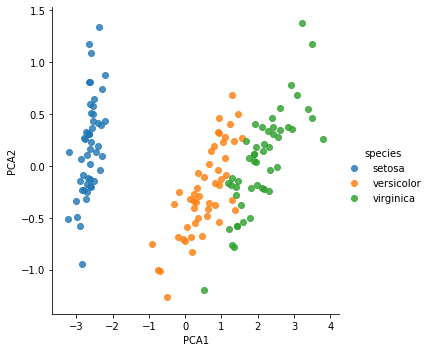

In [28]:
iris['PCA1']= X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot(x='PCA1', y='PCA2', hue='species', data=iris, fit_reg=False)  #lmplot for linear model plot 

<span style='color:red'> With 2D representation, the species are fairly well separated. This means simple classification model will be effective. 

#### Data Clustering ####

In [33]:
from sklearn.mixture import GaussianMixture                      # 1. choose model
model=GaussianMixture(n_components=3, covariance_type='full')     # 2. instantiate model 
model.fit(X_iris)                                                 #3. fit model to data
y_gmm = model.predict(X_iris)                                   # 4. determine labels 

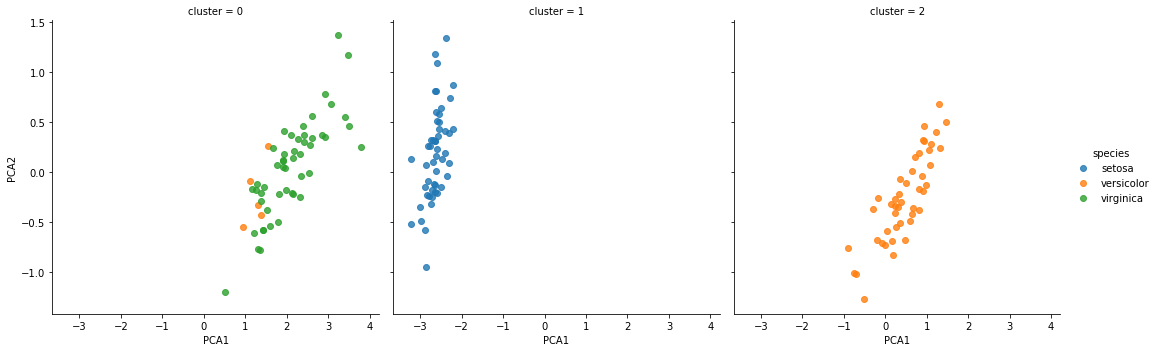

In [34]:
iris['cluster'] = y_gmm        # add a column to irir dataset names cluster where the label determined using gaussian mixutre
sns.lmplot(x='PCA1', y='PCA2', data=iris, hue='species', col='cluster', fit_reg=False);